# Cauchy conditions

In the case of Cauchy conditions, the problem can be solved by stepping forward in time using the solution on the boundary and the first interior point. The solution on the first interior point can be found by using the condition for the derivative.

### General form

The function and normal derivative on each boundary. Applied to a general class of second order ODE :

\begin{equation*}
y^{\prime\prime}=f(y(x),y^{\prime}(x),x), \qquad y(a)=\alpha, \quad y^{\prime}(b)=\beta.
\end{equation*}

Or, to a general second order PDE

\begin{align*}
& A(x,y)\psi_{xx}+B(x,y)\psi_{xy}+C(x,y)\psi_{yy}=f(x,y,\psi,\psi_x,\psi_y),\\
& \psi(x,y)=\alpha(x,y), \quad \underline{n}.\psi = \beta(x,y).
\end{align*}

The solution can only be found in the region between the characteristic drawn through the initial domain $D$. The solution at all points in space is determined by the points they are projected from.

## Problem 1 : A clamped ODE

We will solve the following second order ODE, which has "clamped" boundary conditions

```{math}
:label: 2order
\frac{\mathrm{d}^2 y}{\mathrm{d}x^2} + \frac{\mathrm{d}y}{\mathrm{d}x}-6 y = 0, \qquad y(0)=1, \quad y^{\prime}(0)=0.
```

The problem could be re-written in array form by definining $z=y^{\prime}$ to obtain:

\begin{equation}\frac{\mathrm{d}}{\mathrm{d}x}\left[\begin{array}{cc}z\\y\end{array}\right]=\left[\begin{array}{cc}6y-z\\z\end{array}\right]\end{equation}

Therefore it could be solved using any of the methods for first order IVPs previously illustrated (see, e.g {numref}`heun-vector`). However, to demonstrate the used of techniques we will need for solving partial differential equations, we will instead proceed with use of finite difference formulae in equation {eq}`2order`.

### Forward difference solution

By using the finite difference formulae {eq}`forward2` and {eq}`forwards1`, we obtain

\begin{equation}
y_{k+2}=(2-h)y_{k+1}+(6h^2+h-1)y_k
\end{equation}

Notice that we need two starting points $y_0$ and $y_1$ for this scheme, since the problem is second order. This is equivalent to defining $y(0)$ and $z(0)$ in the array version of the problem. We can obtain the required values from the given initial conditions $y(0)=1$ and $y^{\prime}(0)=0$.

By using the the first order forward finite difference formula we obtain

\begin{equation}\frac{y_1-y_0}{h^2}=y^{\prime}_0 = 0 \quad \Rightarrow \quad y_1 = y_0=1.\end{equation}

An implementation of the forward stepping method is given below. By comparing to the analytic result it is seen that the solution has the correct shape, but relatively poor accuracy, as expected.

SHOW SOLUTION!

### Central difference solution

We can do better using a quadratic order scheme based on central differences. Note that it is not possible to use a central difference scheme for first order IVPs because the first derivative result requires the use of two starting grid points. We can do it for second order IVPs because two starting conditions are given.

By applying the central formulae for the first and second derivatives {eq}`central2` and {eq}`central1a`, we obtain

\begin{equation}y_{k+1} = \frac{y_k(2+6h^2)-y_{k-1}(1-h/2)}{1+h/2}\end{equation}

Using a central differences formula for the boundary condition gives:

\begin{equation}\frac{y_1-y_{-1}}{h} = 0 \quad \Rightarrow \quad y_1= y_{-1}.\end{equation}

However, this relationship involves the solution at the "fictitious" point $y_{-1}$ where $x=-h$. We do not know the result at this fictitious point, but we can proceed by solving the three equations at the left-hand end simultaneously to obtain our starting points. We have

\begin{equation}y_1=-y_{-1}, \quad y_0=1, \quad y_1=\frac{(h-2)y_{-1}+4(3h^2+1)y_0}{h+2}.\end{equation}

Together, these equations give $y_{-1}=1+3h^2$ and so we can start our forward propagation scheme.

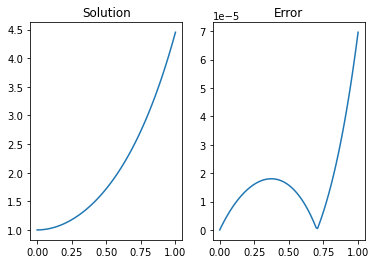

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n=100
x=np.linspace(0,1,n)
h = x[1]-x[0]

coeff1 = 1-h/2
coeff2 = -2-6*h**2
coeff3 = 1+h/2

A = np.diag(coeff1*np.ones((1,n-1))[0], -2) + \
    np.diag(coeff2*np.ones((1,n))[0], -1) + \
        np.diag(coeff3*np.ones((1,n+1))[0],0)

b = np.zeros((n+1,1))

A[0,[0,1,2]] = [-1,0,1]
b[0]=0
A[1, [0,1,2]] = [0,1,0]
b[1] = 1

y,_,_,_= np.linalg.lstsq(A,b,rcond = None)
y = y[1:]

fig,ax = plt.subplots(1,2)
ax[0].plot(x,y)
ax[0].set_title('Solution')
ysol = (2*np.exp(-3*x) + 3*np.exp(2*x))/5
ax[1].plot(x,abs((y.T-ysol).T))
ax[1].set_title('Error')
plt.show()

## Matrix approach

As an alternative to solving the left-hand points by hand, we can write the full system of equations for all nodes including the fictitious node as a matrix and solve simultaneously using Gaussian elimination. We have

\begin{equation}\left[\begin{array}{c|ccccc}-1 &0 &1 & 0 & \dots & 0&\\\hline0 &1 &0 & 0 & \ddots &\vdots\\1-h/2 & -(2+6h^2) & 1+h/2 & 0 & \ddots &\vdots\\0 & 1-h/2 & -(2+6h^2) & 1+h/2 & \ddots&\vdots\\\vdots& \vdots & \ddots &\ddots &\ddots & 0\\0 & \dots & 0& 1-h/2 & -(2+6h^2) & 1+h/2\end{array}\right]\left[\begin{array}{cc}y_{-1}&\\\hline y_0\phantom{\vdots}&\\y_1&\phantom{\vdots}\\y_2\phantom{\vdots}&\\ \vdots&\\y_N\end{array}\right]=\left[\begin{array}{cc}0&\\\hline1&\phantom{\vdots}\\0&\phantom{\vdots}\\0&\phantom{\vdots}\\\vdots&\\0\end{array}\right]\end{equation}


This system is of the form $AX=B$. If you are struggling to understand where the result comes from, write down the some of the simultaneous equations that you get by computing the product $AX$. You should see that each row in the system gives the equation relating a node to its neighbours using the finite difference formula. The boundary conditions are implemented in the first and second rows.

You can solve the simultaneous system in Python by using the lstsq function from numpy's linear algebra module (linalg).

```{exercise}
Set up matrices $A$ and $B$ for the problem in Python for step $h=10^{-3}$ and solve to obtain the solution for $y$.
```

## D'Alembert

\begin{equation*}
u_{tt}=c^2 u_{xx}, \quad y(x,0)=\phi(x), \quad u_t(x,0)=\psi(x)
\end{equation*}

Do this problem first, before considering the below which is Cuachy in time and Dirichlet in space.

## 1D wave equation with Cauchy conditions
In this example we will solve the problem
```{math}
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2u}{\partial x^2}, \qquad t\in(0,T), \quad x\in(0,L),
\begin{align}\end{align}
```

Subject to the following initial conditions:
\begin{equation*}
u(0,x)=2 e^{-(x-L/2)^2}, \quad \frac{\partial u(0,x)}{\partial t}= 0
\end{equation*}
and the following boundary conditions:
\begin{equation*}
u(t,0)=0, \quad u(t,L)=0.
\end{equation*}

### Solution
We will define the following solution grid
\begin{align*}
t_{n}&=n\Delta_t,\quad \ & n=0,\ldots,N_{t}, \\
x_{i}&=i\Delta_x,\quad \ & i=0, \ldots,N_{x} \thinspace.
\end{align*}

Application of a central differences formulae for the derivatives then gives
\begin{equation*}\tag{tstep}
u^{n+1}_{i}=-u^{n-1}_{i}+2u^{n}_{i}+\left(c\frac{\Delta_t}{\Delta_x}\right)^{2}\left(u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}\right),  \quad i=[1,\dots N_x-1 ],
\end{equation*}
where a  superscript has been used to denote the temporal discretisation and a subscript has been used to denote the temporal discretisation. This formula uses the result at two previous time steps. The given Dirichlet-type conditions for the spatial boundary can be applied by forced modification of the boundary nodes, $u^{n}_0=u^{n}_{N_x}=0$, $n\in[0,\dots N_t]$.

The initial conditions allow a forward-stepping algorithm to be used. The starting value for $u^1_i $ is given by combining the initial condition for the derivative with the ODE formula, which gives
\begin{equation}\tag{interior}u_{i}^{1}=u^{0}_{i}-\frac{1}{2}\left(c\frac{\Delta_t}{\Delta_x}\right)^{2}\left(u^{0}_{i+1}-2u^{0}_{i}+u^{0}_{i-1}\right)\thinspace., \quad i=[1,\dots N_x-1 ].\end{equation}


Summary of steps:
1. Compute $u^0_{i}$ for $i\in[0,\dots N_x]$ from the given initial condition
2. Compute $u^1_{i}$ from (interior), applying BCs $u^{1}_0=u^{1}_{N_x}$
3. Compute $u^{n+1}_{i}$ from (tstep) for $n=[0,\dots N_t-1]$, applying BCs $u^{n}_0=u^{n}_{N_x}$ in each step
4. Solve the problem for the case where $L=4\pi$, $T=20$, $c=4$, and plot $u(t,x)$.


**Solution**

Discretise temporal and spatial variables:

```{code}

clear;
c = 4; L = 4*pi; T = 20; % given parameters

x = linspace(0,L);  % discretisation of spatial dimension
Dx= x(2)-x(1);      % spatial step size

r=0.95; Dt=r*Dx/c;  %temporal step size via Courant parameter r

% Note: Dt, Dx are arbitrary, but keep r=c*Dt/Dx < 1 for stability.
% Try r=1.01 to see what happens when this condition is violated.

t = 0:Dt:T;         %discretisation of temporal dimension

Nx=numel(x); Nt=numel(t);

```

Set up a grid to record $u(t_n,x_i)$

```{code}
u = zeros(Nt,Nx);                          %solution grid
ii=2:Nx-1;                                 %interior x indices
%--------------------------------------------------------------
% FILL IN INITIAL CONDITIONS
u(1,:) = 2*exp(-(x-L/2).^2);                              %u(0,x)

%For a standing wave solution try instead (where k is an integer)
%k=1; u(1,:)=sin(2*pi*k*x/L);

u(2,ii) = u(1,ii)-r^2/2*(u(1,ii+1)-2*u(1,ii)+u(1,ii-1));  %u(Dt,x)

%--------------------------------------------------------------
% APPLY UPDATE RULES
for n = 3:Nt
    neigh=u(n-1,ii+1)-2*u(n-1,ii)+u(n-1,ii-1);
    u(n,ii)=-u(n-2,ii)+2*u(n-1,ii)+r^2*neigh;
end
%--------------------------------------------------------------
```

A surface plot of the solution shows that
* the initial disturbance propagates away from the origin in both directions
* disturbances are reflected at both boundaries and travel back along the mirror path

```{code}
[X,T]=meshgrid(x,t);
figure
surfc(T,X,u,'LineStyle','none')
xlabel('t');ylabel('x')
```

We can also produce a time animation of the behaviour

```{code}
%figure;s=round(0.1/Dt);N=8/Dt;
%for n = 1:s:N
%    cla; plot(x,u(n,:)); axis([0,L,-2,2]); drawnow;
%    pause(0.1);
%end
```


## Damped 1D wave equation

The one-dimensional damped wave equation is given by

```{math}
\frac{\partial^2\phi}{\partial t^2}+\gamma \frac{\partial \phi}{\partial t}=c^2\frac{\partial^2\phi}{\partial x^2}.
```

By using the central difference formulas the equation of motion can be written in the following discretised form:
```{math}
:label: dampwave
\left(1+\frac{\gamma}{2}\Delta t\right)\phi_{i+1,j} = 2\phi_{i,j}+r^2(\phi_{i,j-1}-2\phi_{i,j}+\phi_{i,j+1})-\phi_{i-1,j}\left(1-\frac{\gamma}{2}\Delta t\right),
```
where $r=\frac{c\Delta t}{\Delta x}$ and $\phi_{i,j}=\phi(t_i,x_j)$. We will take $c=0.2$, $\gamma=-0.5$.


**Step 1:**
Employ a suitable discretisation based on the time iteration formula {eq}`dampwave` to solve the damped wave equation for $t\in[0,4]$, $x\in[0,2]$ subject to
\begin{equation*}
\phi(t=0) = \sin\left(2\pi x\right), \quad \phi(t=\Delta t) = \sin\left(2\pi (x-c\Delta t)\right).
\end{equation*}
Due to the periodicity of the disturbance, the end-conditions on the spatial grid can be taken such that the solution "wraps around", i.e.
\begin{equation*}
\phi(x=-\Delta x) = \phi(x=2\pi), \quad \phi(x=2\pi +\Delta x)=\phi(x=0).
\end{equation*}
You may find the `circshift` function useful in constructing your answer.

**Step 2:**
Produce a surface plot of your solution for $\phi(x,t)$ and label the axes.

**Step 3:**
To illustrate the amplitude evolution of the disturbance, produce a plot of
\begin{equation*}
\frac{\phi_{max}(t=t_i)}{\phi_{max}(t=0)}\quad \text{for}\quad t_i\in[0,4].
\end{equation*}

**Step 4:**
Use your surface plot and amplitude evolution plot to comment on the behaviour of the disturbance.

**Step 5:**
Describe how the accuracy and convergence/stability of the solution depend on $\Delta t$, $\Delta x$ and the Courant parameter $r$.

**Solution**

```{code}
clear;
c = 0.2; g=0.5; L = 2; T = 4; % given parameters

Nt=81; Nx=200;
x = linspace(0,L,Nx);  % discretisation of spatial dimension
t = linspace(0,T,Nt);  % discretisation of spatial parameter
Dt=T/(Nt-1); Dx=L/(Nx-1);

r=c*Dt/Dx              % ensure it's less than 1

F=zeros(Nt,Nx);
F(1,:)=sin(2*pi*x);            %phi(0,x)
F(2,:) = sin(2*pi*(x-c*Dt));   %phi(Dt,x) - see comment at end

%w=sqrt(c^2*(2*pi)^2-g^2/4);
%cp=w/2/pi;
%F(2,:)=exp(-g/2*Dt)*sin(2*pi*(x-cp*Dt));

K0=(1-g*Dt/2); K2=(1+g*Dt/2);  %constants appearing in update rule

for i=2:Nt-1
   f=F(i,:);
    neigh=circshift(f,1)-2*f+circshift(f,-1);
    F(i+1,:)=(2*f+r^2*neigh-K0*F(i-1,:))/K2;
end

surf(x,t(1:5:end),F(1:5:end,:),'EdgeColor','none')
xlabel('x');ylabel('t');zlabel('\phi')

plot(t,max(F,[],2)/max(F(1,:)))
xlabel('t');ylabel('\phi_{max}');

```

The solution becomes more accurate as the size of the spatial and temporal steps reduces, but needs very small steps to achieve a smooth solution profile.
The stability is sensitive to the Courant parameter . For $r<1$ the solution converges, whilst for $r>1$ it does not. You can explore this behaviour by comparing the solutions for nt= 80, 81 for nx=200.

**Concerning the given result for : $\phi(\Delta t,x)$**
The given result came from the analytic solution for the undamped case (when $\gamma=0$). Whoever wrote this question must have believed it would give a good approximation to the analytic solution for the undamped case. However, the result given by using this condition is unphysical. Our numeric solution rightly shows a travelling wave of decaying amplitude, but the staggered rate of decay doesn't match reality.

Hand derivations indicate that the PDE admit particular solutions of the form $\phi=e^{-\frac{\gamma}{2}t}\sin(kx-\omega t)$, where $\omega^2=k^2c^2 -\left(\frac{\gamma}{2}\right)^2$. If this analytic result is used to determine $\phi(\Delta t,x)$, the amplitude will be seen to decay exponentially with rate determined by the strength of the damping. This finding highlights again the importance of taking great care with the accurate implementation of any boundary conditions.

**What if we can't use an analytic solution to determine $\phi(\Delta t,x)$?**
In that case, we could determine the result from a pair of initial conditions of the form $\phi(0,x)=f(x)$, $\phi_t(0,x)=g(x)$, by using the central difference formula for the first derivative boundary condition, in conjunction with the update rule given by the PDE. This is the method used in the previous question for the undamped case.
The functions $f(x)$ and $g(x)$ would need to be informed by the physical problem. The solution would (likely) not be a single travelling harmonic, but would consist of a wavepacket (sum of) harmonics.

**Worked example**

Cauchy in time, Dirichlet in space

\begin{multline*}u_{tt}=c^2 u_{xx}, \qquad t\in(0,T),x\in(0,L)\\
u(x,0)=2e^{-(x-L/2)^2}, \quad u_t(0,x)=0, \quad u(t,0)=0, \quad u(t,L)=0
\end{multline*}

Generally use forward stepping (do first!)

$x=0: \quad u(0,0)=2e^{-L^2/4}$
$x=L: \quad u(0,L)=2e^{-L^2/4}$

(both very small)



## More hyperbolic problems

**Sine-Gordon**

\begin{equation*}
u_{tt}=u_{xx}-\sin(u)
\end{equation*}


**D'Alembert wave**

\begin{equation*}
u_{tt}=c^2 u_{xx}, \qquad y(x,0)=\phi(x), \quad u_t(x,0)=\psi(x)
\end{equation*}

Hyperbolic in $(x,t)$ plane